# Projet Fraude 



In [1]:
import warnings
warnings.simplefilter('ignore')
#autres
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn as sklearn

### Importer les dataset

In [2]:
#target --> class : 1 Fraud | 0 ok
df_fraud = pd.read_csv('../data/Fraud_Data.csv', sep=','); df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
temp = df_fraud[(df_fraud['browser'] == 'Chrome')]
temp.head(100)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
11,73884,2015-05-29 16:22:02,2015-06-16 05:45:58,58,ZTZZJUCRDOCJZ,Direct,Chrome,M,32,4.038285e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
255,109823,2015-05-22 10:13:02,2015-05-28 14:33:44,37,KQBNZYSPTPMRO,Ads,Chrome,M,41,2.453510e+09,0
267,108674,2015-06-21 20:04:15,2015-08-07 09:21:11,63,XFVSJZHOIQPUM,SEO,Chrome,F,31,7.203865e+08,0
271,128699,2015-06-24 12:34:18,2015-08-30 06:01:26,19,CKNLCTGZVBVQZ,Ads,Chrome,M,22,3.695006e+08,0
272,10766,2015-06-15 16:47:39,2015-08-14 17:26:25,20,EVXMNTHXHTJLD,Direct,Chrome,M,31,2.315134e+09,0


In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
df_ip = pd.read_csv('IpAddress_to_Country.csv', sep=','); df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
temp = df_ip[(df_ip['lower_bound_ip_address'] < 16777371) & (df_ip['upper_bound_ip_address'] > 16777371)]['country']
print(type(temp[0]))

<class 'str'>


### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

In [8]:
df_fraud['country'] = ""
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,


In [9]:
for i, row in df_fraud.iterrows():
    temp = df_ip[(df_ip['lower_bound_ip_address'] < row['ip_address']) & (df_ip['upper_bound_ip_address'] > row['ip_address'])]['country']
    if len(temp) == 1:
        df_fraud.at[i, 'country'] = temp.values[0]
    else:
        df_fraud.at[i, 'country'] = "Na"

df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Na
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [10]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
time_diff = df_fraud['purchase_time'] - df_fraud['signup_time']
time_diff = time_diff.apply(lambda x: x.seconds)
df_fraud['time_diff'] = time_diff

In [11]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Na,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [12]:
device_num = df_fraud[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
df_fraud = df_fraud.merge(device_num, how='left', on='device_id')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Na,60085,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1


### Faire de même pour les `ip_address` 

In [13]:
device_num = df_fraud[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'ip_num'})
df_fraud = df_fraud.merge(device_num, how='left', on='ip_address')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Na,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [14]:
df_fraud["signup_day"] = df_fraud["signup_time"].dt.dayofweek
df_fraud["signup_week"] = df_fraud["signup_time"].dt.week
df_fraud["purchase_day"] = df_fraud["purchase_time"].dt.dayofweek
df_fraud["purchase_week"] = df_fraud["purchase_time"].dt.week
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Na,60085,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1,1,30,2,37


### Définir vos variables de travail (X,y)

In [15]:
y = df_fraud[["class"]]
y.values

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [16]:
X = df_fraud[["signup_day", "signup_week", "purchase_day", "purchase_week", "purchase_value", "source", "browser", "sex", "age", "country", "time_diff", "device_num", "ip_num"]]
X.values

array([[1, 9, 5, ..., 13882, 1, 1],
       [6, 23, 0, ..., 17944, 1, 1],
       [3, 1, 3, ..., 1, 12, 12],
       ...,
       [1, 10, 2, ..., 28816, 1, 1],
       [3, 28, 0, ..., 48519, 2, 1],
       [2, 24, 1, ..., 68493, 1, 1]], dtype=object)

### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   signup_day      151112 non-null  int64 
 1   signup_week     151112 non-null  int64 
 2   purchase_day    151112 non-null  int64 
 3   purchase_week   151112 non-null  int64 
 4   purchase_value  151112 non-null  int64 
 5   source          151112 non-null  object
 6   browser         151112 non-null  object
 7   sex             151112 non-null  object
 8   age             151112 non-null  int64 
 9   country         151112 non-null  object
 10  time_diff       151112 non-null  int64 
 11  device_num      151112 non-null  int64 
 12  ip_num          151112 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 16.1+ MB


### Traiter les variables catégoriques

In [19]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
X['source'] = lb.fit_transform(X['source'])
X['browser'] = lb.fit_transform(X['browser'])
X['sex'] = lb.fit_transform(X['sex'])
X['country'] = lb.fit_transform(X['country'])
X.head()

,signup_day,signup_week,purchase_day,purchase_week,purchase_value,source,browser,sex,age,country,time_diff,device_num,ip_num
0,1,9,5,16,34,2,0,1,39,84,13882,1,1
1,6,23,0,24,16,0,0,0,53,172,17944,1,1
2,3,1,3,1,15,2,3,1,53,172,1,12,12
3,1,18,0,19,44,2,4,1,41,115,60085,1,1
4,1,30,2,37,39,0,4,1,45,172,41461,1,1


### Spliter vos variables 

In [21]:
from sklearn.model_selection import train_test_split
#X, Y = train_test_split(new_frame, test_size=300, train_size=699, random_state=42, shuffle=True, stratify=None)
X_train, X_test, y_train, y_test = train_test_split( X, y)

### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 50)
clf.fit(X_train, y_train)
#clf2 = RandomForestClassifier(n_estimators= 20, criterion = 'gini', max_depth= 50)
#clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=20)

In [48]:
preds = clf.predict(X_test)
print(preds)

[0 0 0 ... 0 0 0]


### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accuracy moyenne pour 5 'fold cross validation' est {}%".format(round(scores*100,2)))


L'accuracy moyenne pour 5 'fold cross validation' est 95.6%


### Afficher les `feature_importances_`

In [44]:
importances = clf.feature_importances_
importances

array([0.02750921, 0.05489327, 0.02664896, 0.17960608, 0.05819363,
       0.00967918, 0.01972374, 0.008558  , 0.05176484, 0.03444857,
       0.22854617, 0.18793527, 0.11249311])

In [56]:
feature_imp = pd.Series(importances, index=X.columns.tolist()).sort_values(ascending=False)
feature_imp

time_diff         0.340189
device_num        0.146270
purchase_week     0.092803
signup_week       0.091990
purchase_value    0.072410
age               0.065021
country           0.042161
ip_num            0.035036
signup_day        0.033034
purchase_day      0.032992
browser           0.023367
source            0.013127
sex               0.011601
dtype: float64

### Vizualiser les sur un graphique 

<AxesSubplot:>

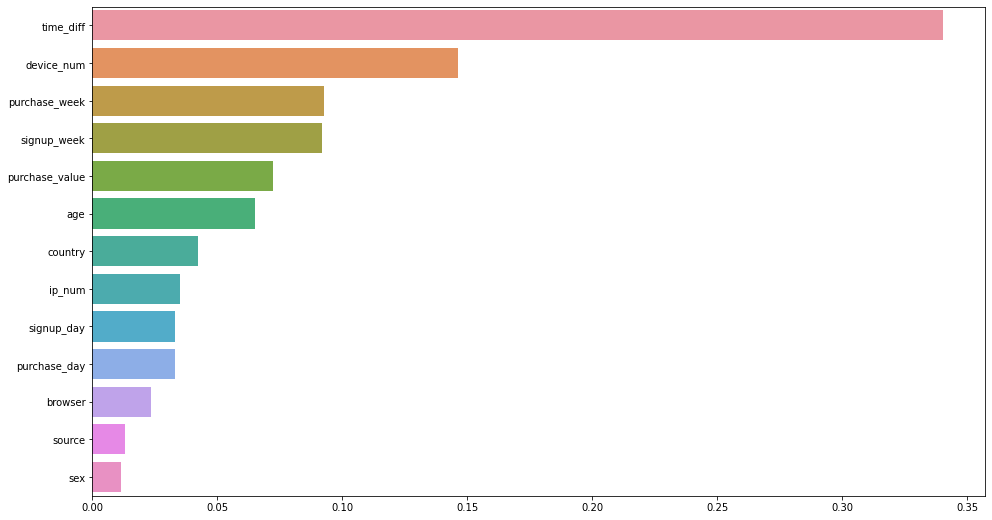

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.barplot(x=feature_imp, y=feature_imp.index)

### Afficher le `Classification report`

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34214
           1       0.99      0.54      0.70      3564

    accuracy                           0.96     37778
   macro avg       0.97      0.77      0.84     37778
weighted avg       0.96      0.96      0.95     37778



### Traçer la courbe AUC 

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

### Faire une selection de certaine variables et spliter vos varibales 

### Entrainer un classifieur `LogisticRegression` sur ces variables 